In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pyarrow


In [188]:
def find_co2_vertically(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    no_x = data.filter(["z", "diff0694"], axis=1)
    no_x = scaler.fit_transform(no_x)
    kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=500)
    kmeans.fit(no_x)
    data["labels"] = kmeans.labels_
    labels_sizes=sliceSeismic.groupby(["labels"]).size()
    label_of_carbon_dioxide_and_water=labels_sizes.argmin()
    data_with_carbon_dioxide_and_water = data[data["labels"]==label_of_carbon_dioxide_and_water]
    no_x = data_with_carbon_dioxide_and_water.filter(["z", "x"], axis=1)
    no_x = scaler.fit_transform(no_x)
    kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=500)
    kmeans.fit(no_x)
    data_with_carbon_dioxide_and_water["labels"] = kmeans.labels_
    mean_depth=data_with_carbon_dioxide_and_water.groupby("labels").quantile(0.75)["z"]
    label_co2_or_water=[3 if i>300 else 2 for i in mean_depth]
    new_labels=np.zeros(len(data_with_carbon_dioxide_and_water))
    data_with_carbon_dioxide_and_water=pd.DataFrame(data_with_carbon_dioxide_and_water)
    counter=0
    for i in data_with_carbon_dioxide_and_water.index:
        new_labels[counter]=label_co2_or_water[int(data_with_carbon_dioxide_and_water.loc[i]["labels"])]
        counter+=1
    data_with_carbon_dioxide_and_water["labels"] = new_labels
    new_labels=[1 if data.loc[idx]["labels"]!=label_of_carbon_dioxide_and_water else data_with_carbon_dioxide_and_water.loc[idx]["labels"] for idx in data.index]
    data["labels"]=new_labels
    return data

In [189]:
def show_co2(data):
    data = test.pivot(columns = "x", index = "z", values = "labels")
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.imshow(data, cmap = "plasma")
    plt.xlabel("yellow - co2, red - water, blue - rocks")
    plt.plot()

In [190]:
sliceSeismic.drop("labels", axis=1, inplace=True)

/tmp/ipykernel_13147/2620075020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sliceSeismic.drop("labels", axis=1, inplace=True)


In [191]:
test=find_co2_vertically(sliceSeismic)

/tmp/ipykernel_13147/1447914322.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["labels"] = kmeans.labels_
/tmp/ipykernel_13147/1447914322.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_carbon_dioxide_and_water["labels"] = kmeans.labels_
/tmp/ipykernel_13147/1447914322.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

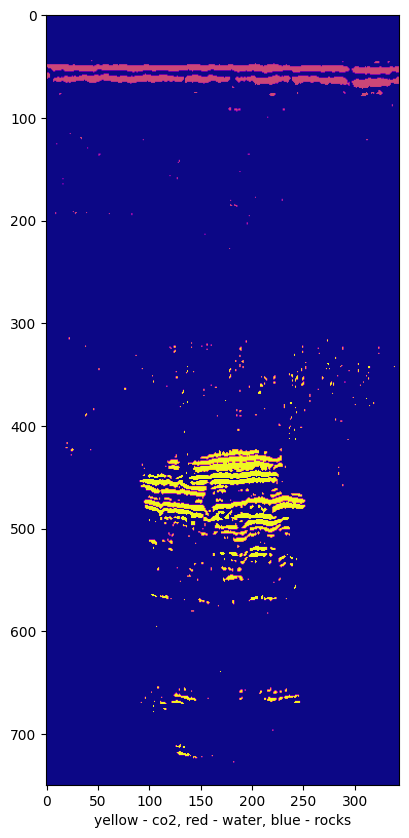

In [192]:
show_co2(test)